# Movie Industry EDA 

## Objective: Investigate the film industry to gain sufficient understanding of what attributes to success and in turn utilize this analysis to create actionable recommendations for industry entry.

In [288]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [289]:
movie_date = pd.read_csv('movie_release_dates.csv', index_col=0, parse_dates = ['release_date']) #movie release date
theaters = pd.read_csv('movie_theater_data.csv', index_col=0) #how many theaters did the movie appeared and its rev
awards = pd.read_csv('movie_awards.csv', index_col=0) #no. of awards and nominated
actors = pd.read_csv('Actors_Table.csv') #the value actors for the movies
directors = pd.read_csv('Directors_Table.csv') #the directors for the movies
imdb_base = pd.read_csv('IMDb_base.csv') #imdb, rating, runtime and genre
imdb_budgets = pd.read_csv('IMDb_budgets.csv') #prod budget, domestic gross, world gross
studio = pd.read_csv('studiodf.csv') #studio and the rev domestically and other country

In [290]:
movie_date.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [291]:
theaters.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [292]:
awards.head()

,film_name,film_year,awards_won,awards_nominated,win_rate
0,Parasite,2019,4,6,0.667
1,Ford v Ferrari,2019,2,4,0.500
2,Learning to Skateboard in a Warzone (If You're...,2019,1,1,1.000
3,The Neighbors' Window,2019,1,1,1.000
4,Little Women,2019,1,6,0.167


In [293]:
actors.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [294]:
directors.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [295]:
imdb_base.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi"


In [296]:
imdb_budgets.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [297]:
studio.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010


## Question 1: What are the most profitable movies and how much should you spend?


First, we'll remove the movies that has Domestics Revenue = 0, as it is the result of missing data or some errors. 

In [298]:
#Check for the movie that has Dom Rev = 0 and remove it
mask = imdb_budgets['Domestic Gross'] == 0
imdb_budgets[mask]
imdb_budgets = imdb_budgets[~mask]
imdb_budgets['Domestic Gross'].sort_values()

3780          423
3678         3200
3679         3361
3674         6422
3676         7321
          ...    
4       659363944
3       678815482
2       700059566
1       760507625
0       858373000
Name: Domestic Gross, Length: 3740, dtype: int64

Calculate profit and profit margin for each of the movies in *imdb_budgets_df dataframe* and add those as new columns.

Here, we'll define profit as *Worldwide Gross-Production Budget.*

It will also be beneficial in our analysis to have uniformity when discussing movie budgets and profits so we will also create an adjusted budget and adjusted profit column to account for inflation.

We will use an average inflation rate of 3.22%.

In [299]:
imdb_budgets.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [300]:
imdb_budgets['Profit'] = imdb_budgets['Worldwide Gross'] - imdb_budgets['Production Budget']

imdb_budgets['Profit Margin'] = (imdb_budgets['Worldwide Gross'] - 
                                    imdb_budgets['Production Budget'])/imdb_budgets['Worldwide Gross']

In [301]:
imdb_budgets['Adjusted Budget'] = imdb_budgets['Production Budget']*((1 + .0322)**(2023 - imdb_budgets['Year'] ))
imdb_budgets['Adjusted Profit'] = imdb_budgets['Profit']*((1 + .0322)**(2023 - imdb_budgets['Year'] ))

In [302]:
imdb_budgets

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.851423,2.343415e+08,1.342898e+09
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,3.515123e+08,2.048567e+09
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,4.559217e+08,4.577928e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,The Misfits,1961,7.3,Not Rated,125,"Drama, Romance, Western","Feb 1, 1961",4000000,8200000,8200000,4200000,0.512195,2.853770e+07,2.996459e+07
3822,Judgment at Nuremberg,1961,8.2,Approved,179,"Drama, War","Dec 19, 1961",3000000,10000000,10000000,7000000,0.700000,2.140328e+07,4.994098e+07
3824,The Wrong Man,1956,7.4,Not Rated,105,"Drama, Film-Noir","Dec 23, 1956",1200000,2000000,2000000,800000,0.400000,1.003135e+07,6.687569e+06
3826,The Trouble with Harry,1955,7.1,PG,99,"Comedy, Mystery","Oct 3, 1955",1200000,7000000,7000000,5800000,0.828571,1.035436e+07,5.004609e+07


We are specifically looking at profitable movies. We'll create a separate dataframe called *profitable_movies* where the Profit column is greater than 0. Then, because we care about how the profits means to us in the present day, We will then sort by Adjusted_Profit to rank movies in terms of profitability.

In [303]:
mask = imdb_budgets['Profit'] > 0
profitable_movies = imdb_budgets[mask]
profitable_movies = profitable_movies.sort_values(by = 'Adjusted Profit', ascending = False)
profitable_movies.reset_index(inplace = True)

In [304]:
profitable_movies.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit
0,178,Gone with the Wind,1939,8.1,Passed,238,"Drama, History, Romance","Dec 15, 1939",3900000,198680470,390525192,386625192,0.990013,5.587640e+07,5.539288e+09
1,4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,4.559217e+08,4.577928e+09
2,1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09
3,578,Bambi,1942,7.3,G,70,"Animation, Drama, Family","Aug 13, 1942",858000,102797000,268000000,267142000,0.996799,1.117788e+07,3.480282e+09
4,200,Snow White and the Seven Dwarfs,1937,7.6,Approved,83,"Animation, Family, Fantasy","Dec 21, 1937",1488000,184925486,184925486,183437486,0.991954,2.271404e+07,2.800139e+09


Now that we've got our profitable movie data, let's take a look at adjusted profit versus adjusted budget for each of the movies in the dataframe.

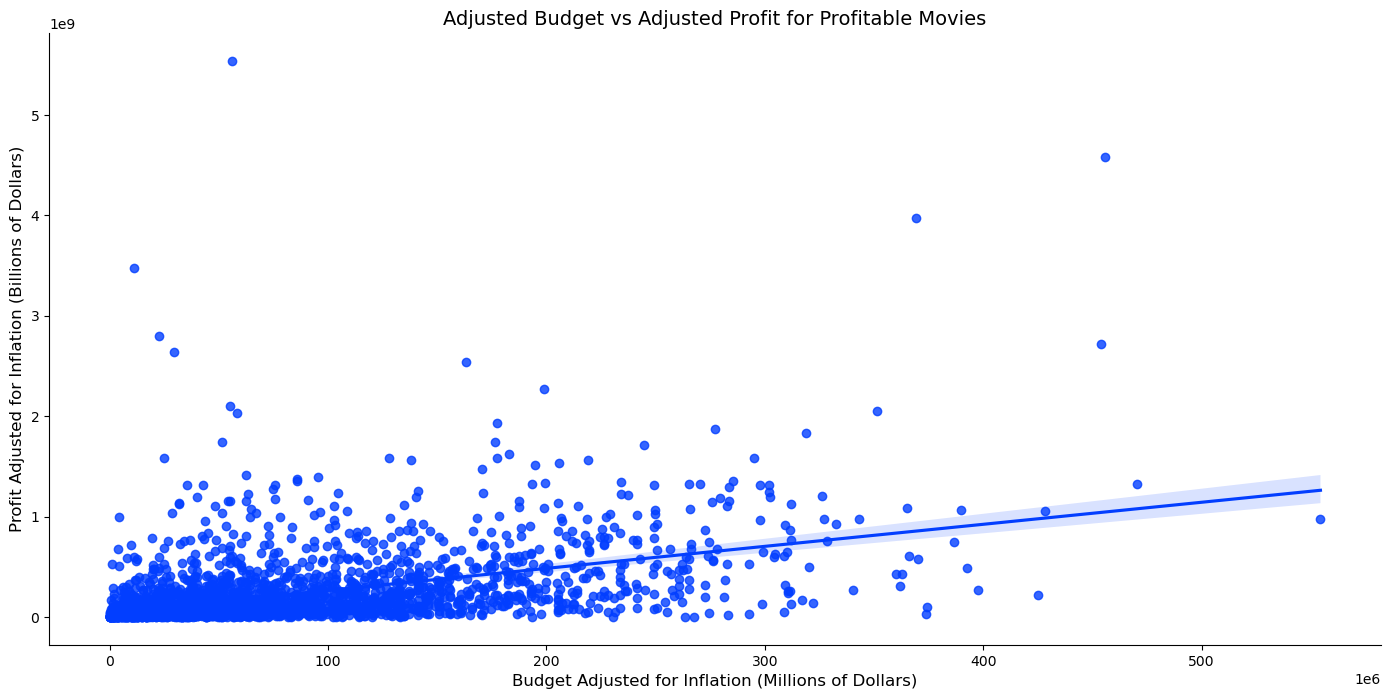

In [305]:
ax1 = sns.lmplot(x='Adjusted Budget', y='Adjusted Profit', data=profitable_movies, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)', fontsize=12)
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontsize=14)
plt.savefig('BudgetVProfit');


#### The positive trend line indicates that an increase in the budget will result in an increase in profit.

Let's take a look at the most successful movies so that we can get a better idea of what the budget should be.

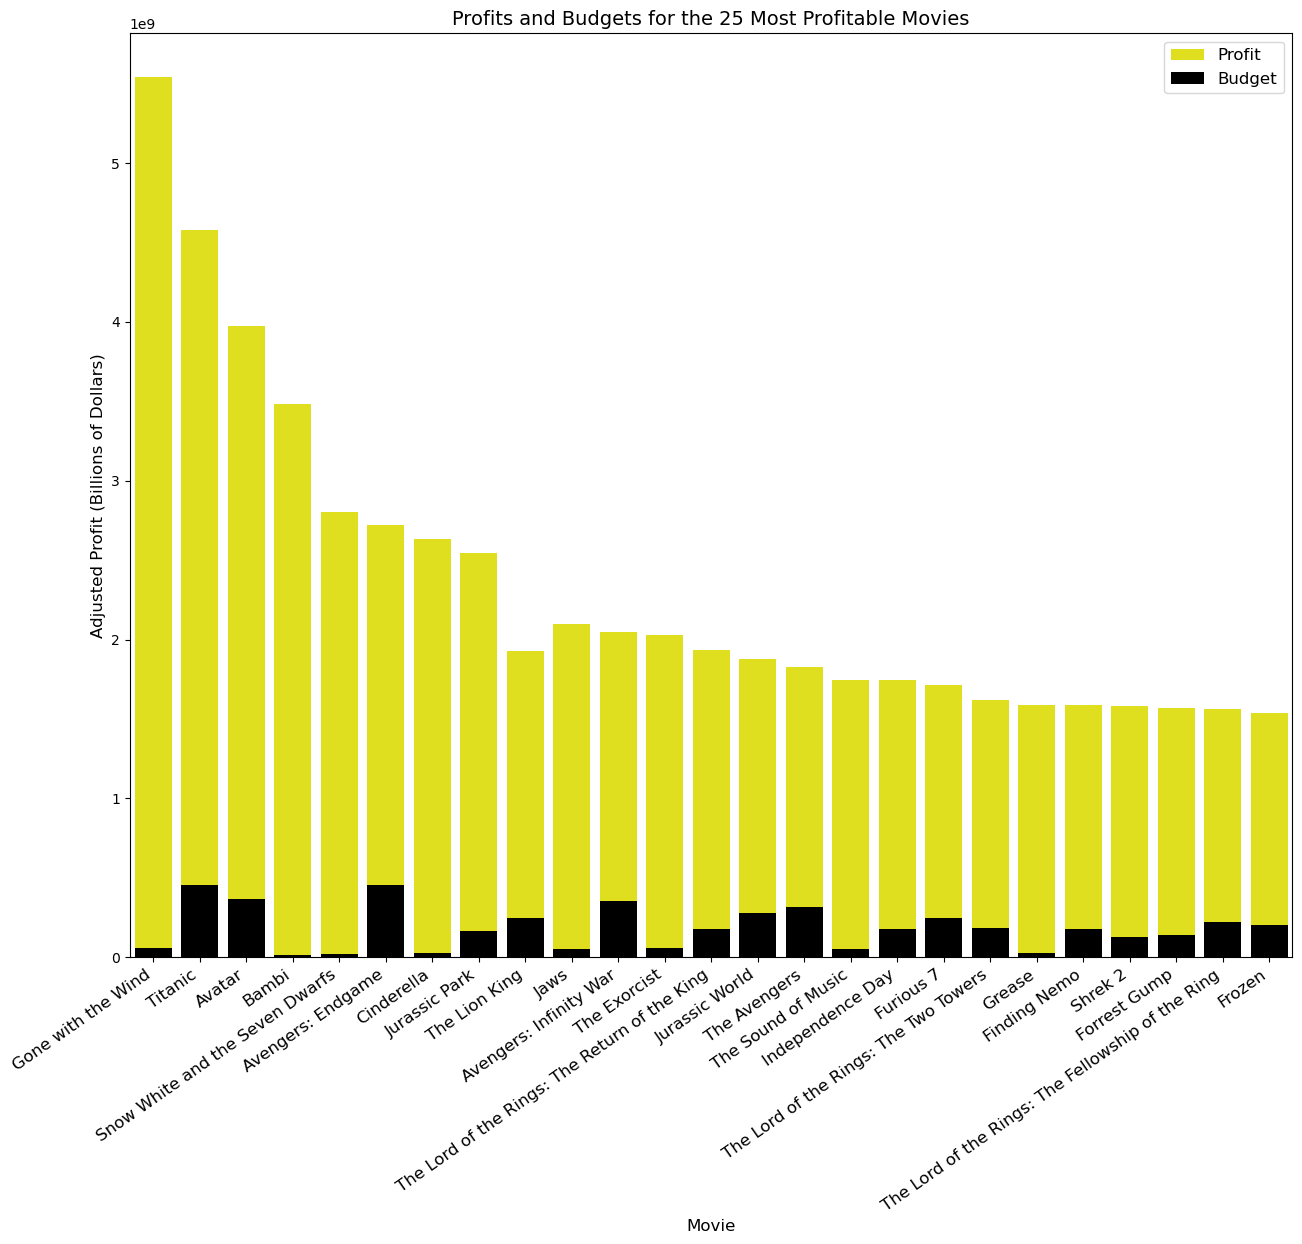

In [306]:
plt.figure(figsize=(15,12))
sns.set_palette('bright')
sns.barplot(x=profitable_movies.loc[0:25, 'Movie'],y=profitable_movies.loc[0:25, 'Adjusted Profit'], 
            color='yellow', label='Profit', ci=None)
sns.barplot(x=profitable_movies.loc[0:25, 'Movie'],y=profitable_movies.loc[0:25, 'Adjusted Budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=14)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('ProfitBudgetTop25');

In [307]:
profitable_movies['Adjusted Budget'].describe()

count    2.836000e+03
mean     7.365576e+07
std      7.381591e+07
min      1.278237e+04
25%      2.139600e+07
50%      4.767609e+07
75%      1.028674e+08
max      5.543773e+08
Name: Adjusted Budget, dtype: float64

In [308]:
profitable_movies.loc[0:24, 'Adjusted Budget'].describe()

count    2.500000e+01
mean     1.854367e+08
std      1.339934e+08
min      1.117788e+07
25%      5.587640e+07
50%      1.771760e+08
75%      2.770444e+08
max      4.559217e+08
Name: Adjusted Budget, dtype: float64

In [309]:
profitable_movies['Profit Margin'].describe()

count    2836.000000
mean        0.621489
std         0.240466
min         0.000265
25%         0.465466
50%         0.671426
75%         0.809796
max         0.997599
Name: Profit Margin, dtype: float64

In [310]:
profitable_movies.loc[0:24, 'Profit Margin'].describe()

count    25.000000
mean      0.921969
std       0.049970
min       0.843085
25%       0.877143
50%       0.916088
75%       0.971977
max       0.996799
Name: Profit Margin, dtype: float64

In [311]:
len(profitable_movies.loc[profitable_movies['Profit Margin'] > 0.5])

2041

Clearly the most successful 25 movies have both incredible profits and profit margins. Gone with the Wind, Titanic, Avatar, Bambi, Snow White and the Seven Dwarfs are the most successful movies in terms of sheer profit.

So how do we know what to spend? We need to think about what sort of profit margin we want to see. 2041 out of 2836 total profitable movies have a profit margin over 50%. That's good news as it indicates that we can be more aggressive in choosing a threshold for the profit margin. The top 25 movies have a median profit margin of 91% with a median budget of $ 177,176,000. $ When looking at all of our profitable movies, the profit margin drops significantly to 67.1% and the budget drops significantly to $47,676,090. We use the median to describe our data here as the mean will be skewed by outlier data.



Let's see the trend when we invest more than $47,676,090 

In [312]:
condition = profitable_movies['Adjusted Budget'] >= 47676090
high_invest = profitable_movies[condition]
len(high_invest)

1418

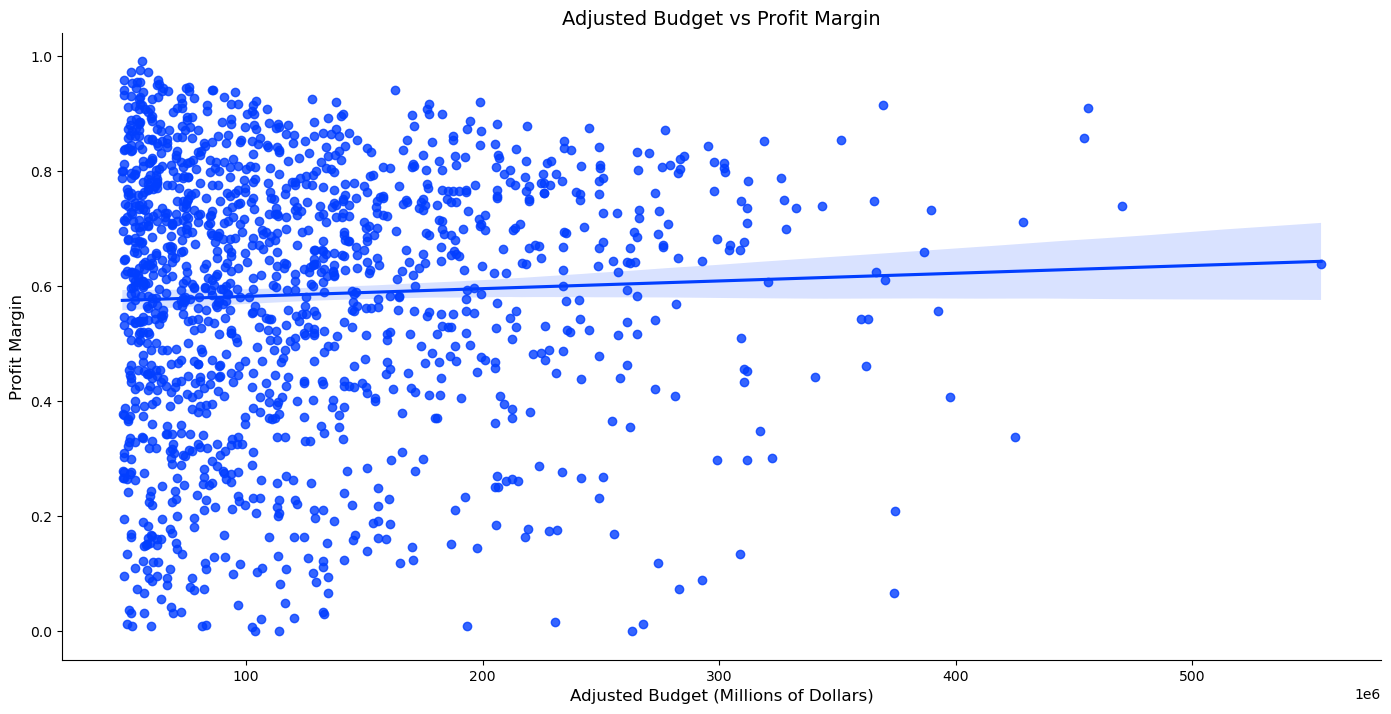

In [313]:
ax2 = sns.lmplot(x='Adjusted Budget', y='Profit Margin', data=high_invest, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Adjusted Budget vs Profit Margin', fontsize=14)
plt.savefig('BudgetVMargin')

This figure doesn't tell us much. Refine our condition to profitability more than 75% to see if we can identify the correlation between high invest and high profit.

In [314]:
condition2 = profitable_movies['Profit Margin'] >= 0.75
high_invest_n_high_profit = profitable_movies[condition & condition2]

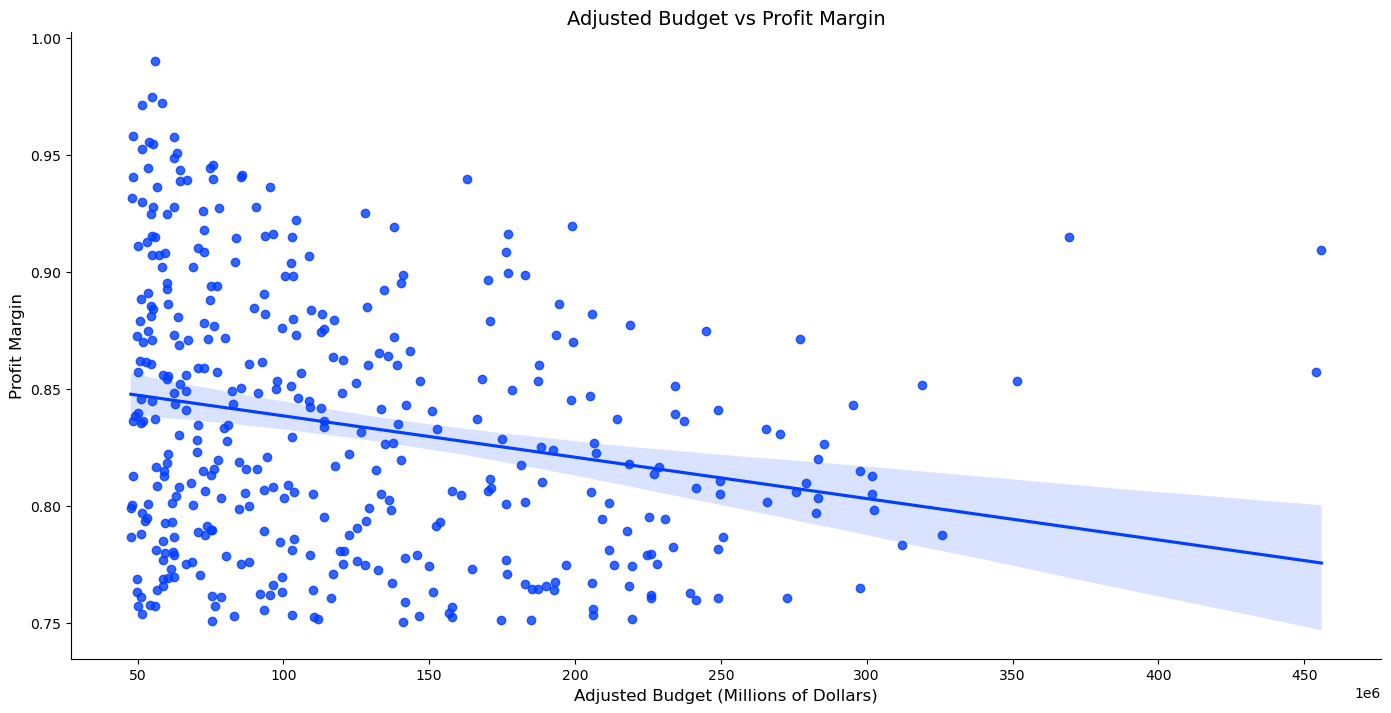

In [315]:
ax2 = sns.lmplot(x='Adjusted Budget', y='Profit Margin', data=high_invest_n_high_profit, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Adjusted Budget vs Profit Margin', fontsize=14)
plt.savefig('BudgetVMargin')

In [316]:
high_invest_n_high_profit.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit
count,394.000000,394.000000,394.000000,394.000000,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,394.000000,3.940000e+02,3.940000e+02
mean,407.472081,2002.335025,7.060152,120.522843,7.392996e+07,1.899769e+08,4.703404e+08,3.964104e+08,0.834181,1.242569e+08,7.124944e+08
std,393.282112,13.495242,0.903857,26.465989,5.838893e+07,1.258184e+08,3.752601e+08,3.269498e+08,0.056509,7.397241e+07,5.517238e+08
min,0.000000,1939.000000,3.300000,79.000000,3.900000e+06,1.901988e+07,4.200000e+07,3.600000e+07,0.750282,4.767654e+07,1.566238e+08
25%,117.500000,1995.000000,6.500000,101.250000,3.225000e+07,1.049893e+08,2.093741e+08,1.684303e+08,0.786971,6.387433e+07,3.566201e+08
50%,281.500000,2005.000000,7.100000,117.000000,5.500000e+07,1.626923e+08,3.492766e+08,2.970247e+08,0.826648,1.002218e+08,5.875411e+08
75%,560.750000,2013.000000,7.700000,133.000000,9.400000e+07,2.346404e+08,6.259708e+08,5.013323e+08,0.874611,1.705905e+08,8.930393e+08
max,2424.000000,2020.000000,9.000000,238.000000,4.000000e+08,8.583730e+08,2.797801e+09,2.551701e+09,0.990013,4.559217e+08,5.539288e+09


#### We witnessed a trade off between the Profit Margin and the Investment, as too high the investment, it would hurt our profitbility. The data shows that the movies that gain more than 75% in profit has the median adjusted budget 100,221,800. Combining with the statistical data of the profit and budget of top 25 highest profitable movies, we come to conclusion that we should make our budget in the range of 100,221,800 - 177,176,000 dollars to ensure the profitability is higher than 75%.

## Question 2: Which movie genres are most commonly produced and does quantity equate to higher net profits?

### Clean Data

In [317]:
#check the data in the table
imdb_budgets.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.851423,2.343415e+08,1.342898e+09
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,3.515123e+08,2.048567e+09
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,4.559217e+08,4.577928e+09


Create a table that separate the genre of each movie to individual rows

In [320]:
imdb_budgets['Genre'] = imdb_budgets['Genre'].str.split(',')

In [326]:
genre = imdb_budgets['Genre'].apply(pd.Series)
genre[0] = genre[0].str.strip()
genre[1] = genre[1].str.strip()
genre[2] = genre[2].str.strip()
genre

,0,1,2
0,Action,Adventure,Drama
1,Action,Adventure,Fantasy
2,Action,Adventure,Sci-Fi
3,Action,Adventure,Sci-Fi
4,Drama,Romance,NaN
...,...,...,...
3821,Drama,Romance,Western
3822,Drama,War,NaN
3824,Drama,Film-Noir,NaN
3826,Comedy,Mystery,NaN


In [327]:
clear_genre = pd.merge(imdb_budgets,genre,left_index=True, right_index=True)
refine_imdb = clear_genre.drop('Genre', axis = 1)
refine_imdb

,Movie,Year,IMDb,Rating,Runtime,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit,0,1,2
0,Avengers: Endgame,2019,8.4,PG-13,181,"Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Action,Adventure,Drama
1,Avatar,2009,7.8,PG-13,162,"Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09,Action,Adventure,Fantasy
2,Black Panther,2018,7.3,PG-13,134,"Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.851423,2.343415e+08,1.342898e+09,Action,Adventure,Sci-Fi
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,3.515123e+08,2.048567e+09,Action,Adventure,Sci-Fi
4,Titanic,1997,7.8,PG-13,194,"Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,4.559217e+08,4.577928e+09,Drama,Romance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,The Misfits,1961,7.3,Not Rated,125,"Feb 1, 1961",4000000,8200000,8200000,4200000,0.512195,2.853770e+07,2.996459e+07,Drama,Romance,Western
3822,Judgment at Nuremberg,1961,8.2,Approved,179,"Dec 19, 1961",3000000,10000000,10000000,7000000,0.700000,2.140328e+07,4.994098e+07,Drama,War,NaN
3824,The Wrong Man,1956,7.4,Not Rated,105,"Dec 23, 1956",1200000,2000000,2000000,800000,0.400000,1.003135e+07,6.687569e+06,Drama,Film-Noir,NaN
3826,The Trouble with Harry,1955,7.1,PG,99,"Oct 3, 1955",1200000,7000000,7000000,5800000,0.828571,1.035436e+07,5.004609e+07,Comedy,Mystery,NaN


In [328]:
x1 = pd.melt(refine_imdb,id_vars=['Movie', 'Year'], value_vars = [0,1,2], var_name = 'X')
new_imdb = pd.merge(imdb_budgets,x1)
genre_budget = new_imdb.drop(['Genre','X'], axis = 1).drop_duplicates().rename(columns = {'value': 'Genre'}).dropna()

In [329]:
genre_budget.head()

,Movie,Year,IMDb,Rating,Runtime,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit,Genre
0,Avengers: Endgame,2019,8.4,PG-13,181,"Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Action
1,Avengers: Endgame,2019,8.4,PG-13,181,"Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Adventure
2,Avengers: Endgame,2019,8.4,PG-13,181,"Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Drama
3,Avatar,2009,7.8,PG-13,162,"Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09,Action
4,Avatar,2009,7.8,PG-13,162,"Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09,Adventure


In [330]:
genre_count = genre_budget.groupby('Genre', as_index = False)['Movie'].count().sort_values('Movie', ascending = False)

In [331]:
genre_count

,Genre,Movie
6,Drama,1876
4,Comedy,1444
0,Action,1045
1,Adventure,834
5,Crime,689
15,Romance,622
18,Thriller,615
11,Horror,410
14,Mystery,356
16,Sci-Fi,330


### Data analysis

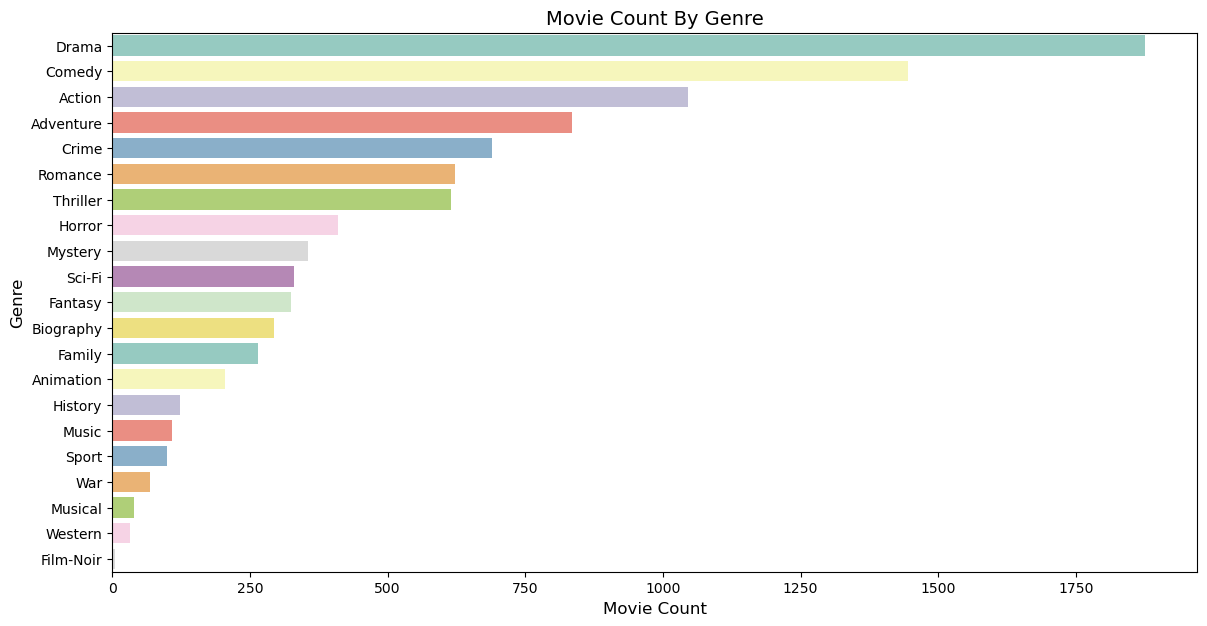

In [364]:
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=genre_count['Movie'], y=genre_count['Genre'], palette='Set3')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14)
plt.savefig('CountGenre')

It seems Drama, Comedy and Action are 3 most produced movie genre. Now we check if these 3 genres would bring the most profitability.

We'll take into account the median Adjust Net Profit and Profit Margin for these genres.

In [339]:
genre_profit = genre_budget.groupby('Genre',as_index=False)['Adjusted Profit','Profit Margin'].median().sort_values(by = 'Adjusted Profit', ascending = False)
list(genre_profit['Genre'].head(6))

['Animation', 'Adventure', 'Sci-Fi', 'Family', 'Action', 'Fantasy']

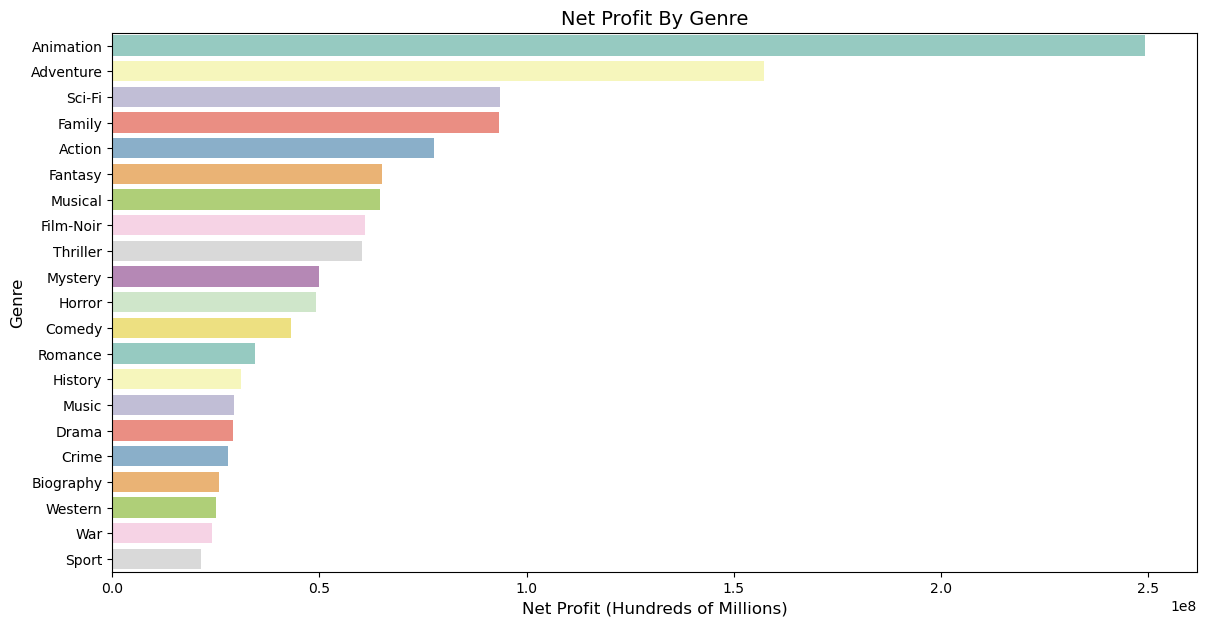

In [334]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=genre_profit['Adjusted Profit'], y=genre_profit['Genre'], palette='Set3')
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Net Profit By Genre', fontsize=14)
plt.savefig('NetProfitGenre')

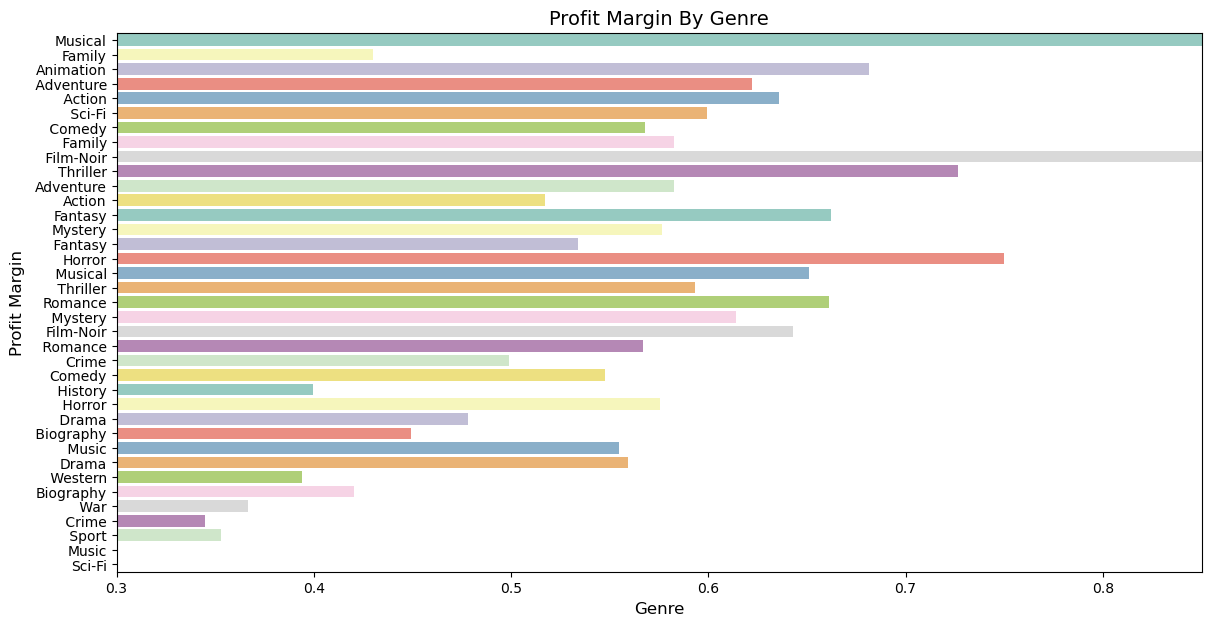

In [195]:
plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=genre_profit['Profit Margin'], y=genre_profit['Genre'], palette='Set3')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Genre', fontsize=14)
plt.xlim(0.3, 0.85)
plt.savefig('ProfitMarginGenre');

Interesting, although they are not the most commonly released genres, Animation, Adventure, Sci-Fi typically have the most success in terms of median net profit. Note: although Film Noir leads with a .8+ profit margin this is based on 6 movies and has to be disregarded due to the small sample size.

We should be focusing on producing the movies in the 6 most profitable genre, namely: 'Animation', 'Adventure', 'Sci-Fi', 'Family', 'Action', 'Fantasy'

## Question 3: What is the best time of the year to release a movie?

### Data cleaning

In [340]:
imdb_budgets.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit
0,Avengers: Endgame,2019,8.4,PG-13,181,"[Action, Adventure, Drama]","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09
1,Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09
2,Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.851423,2.343415e+08,1.342898e+09
3,Avengers: Infinity War,2018,8.4,PG-13,149,"[Action, Adventure, Sci-Fi]","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,3.515123e+08,2.048567e+09
4,Titanic,1997,7.8,PG-13,194,"[Drama, Romance]","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,4.559217e+08,4.577928e+09


In [341]:
#add a column indicate which month has the most movies released
imdb_budgets['Release Date'] = pd.to_datetime(imdb_budgets['Release Date'])
imdb_budgets['Date'] = [x.strftime('%B') for x in imdb_budgets['Release Date']]

In [342]:
imdb_budgets.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit,Date
0,Avengers: Endgame,2019,8.4,PG-13,181,"[Action, Adventure, Drama]",2019-04-23,400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,April
1,Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09,December
2,Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.851423,2.343415e+08,1.342898e+09,February
3,Avengers: Infinity War,2018,8.4,PG-13,149,"[Action, Adventure, Sci-Fi]",2018-04-25,300000000,678815482,2048359754,1748359754,0.853541,3.515123e+08,2.048567e+09,April
4,Titanic,1997,7.8,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.909429,4.559217e+08,4.577928e+09,December


### Data Analysis

In [343]:
movie_month = imdb_budgets.groupby('Date', as_index = False)['Movie'].count().sort_values(by = 'Movie', ascending = False)
movie_month

,Date,Movie
2,December,452
10,October,424
9,November,366
11,September,358
1,August,346
6,June,327
5,July,296
7,March,270
8,May,241
0,April,238


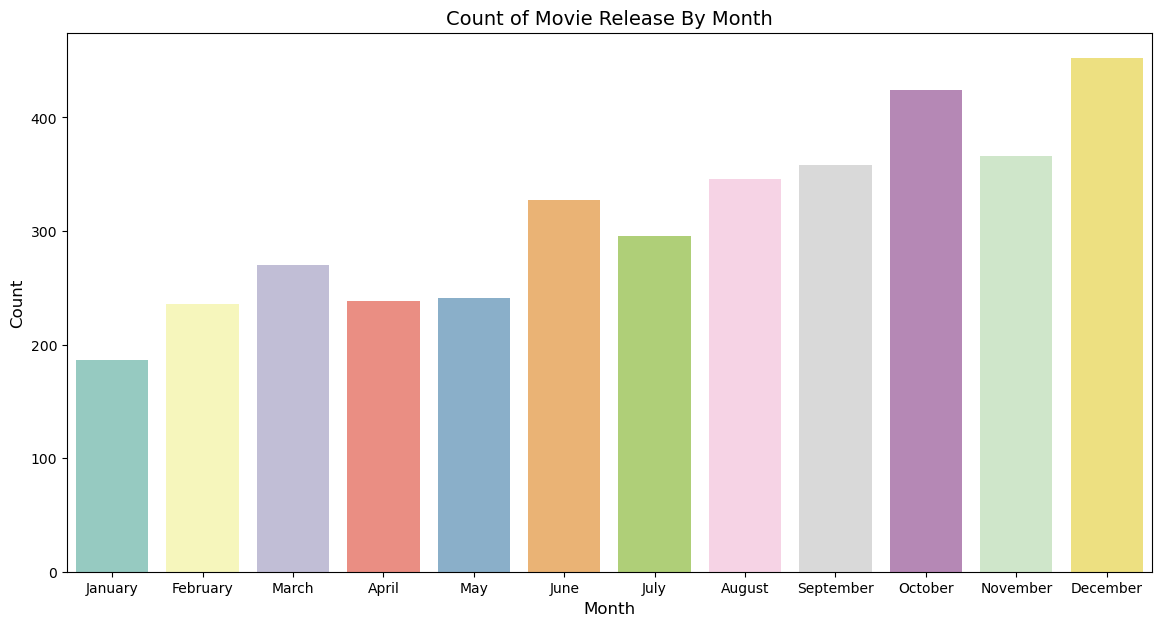

In [344]:
#Plot the above findings in order by month.
plt.figure(figsize=(14,7))
ax6 = sns.countplot(x=imdb_budgets['Date'], palette='Set3',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Movie Release By Month', fontsize=14)
plt.savefig('CountbyMonth')

October and December are the 2 month which have the highest number of movie released. We'll continue to examine the average profitability of the movies released during the years.

In [345]:
profit_months = imdb_budgets.groupby('Date', as_index = False)['Adjusted Profit', 'Profit Margin'].median().sort_values(by = 'Adjusted Profit', ascending = False)
profit_months

,Date,Adjusted Profit,Profit Margin
6,June,1.123013e+08,0.642956
8,May,9.529318e+07,0.638093
5,July,8.761994e+07,0.644061
2,December,7.682789e+07,0.587273
9,November,6.126605e+07,0.571790
3,February,5.012444e+07,0.563982
7,March,4.427501e+07,0.514524
0,April,3.919295e+07,0.541053
4,January,3.857655e+07,0.555721
1,August,3.275698e+07,0.522294


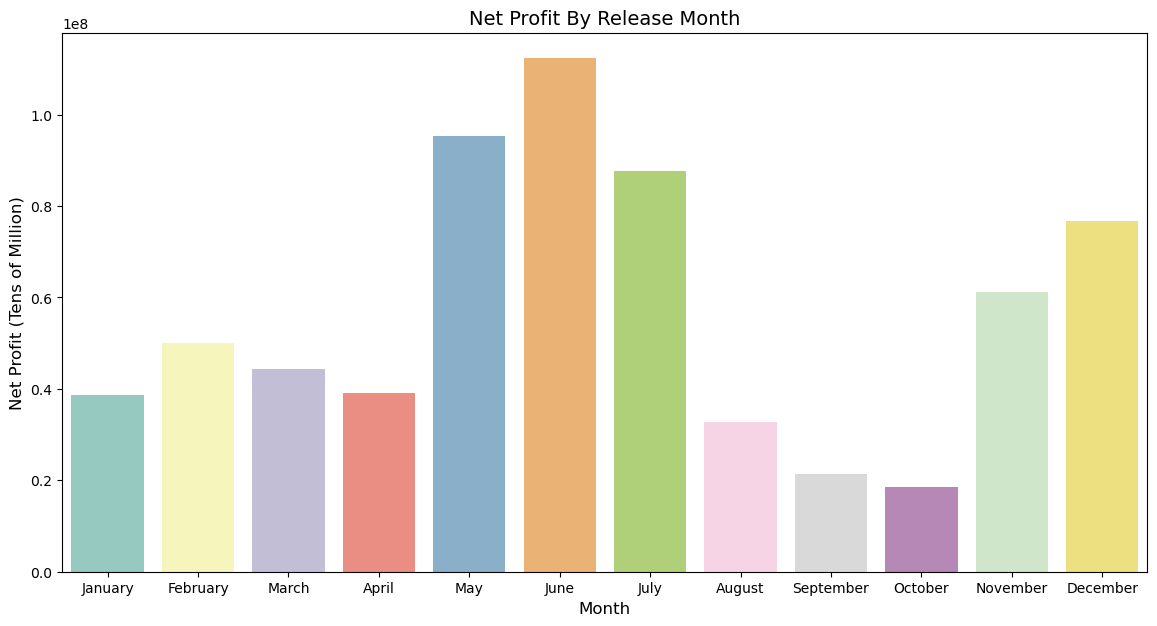

In [346]:
plt.figure(figsize=(14,7))
ax7 = sns.barplot(x=profit_months['Date'], y=profit_months['Adjusted Profit'], palette='Set3', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit (Tens of Million)', fontsize=12)
plt.title('Net Profit By Release Month', fontsize=14)
plt.savefig('ProfitbyMonth');

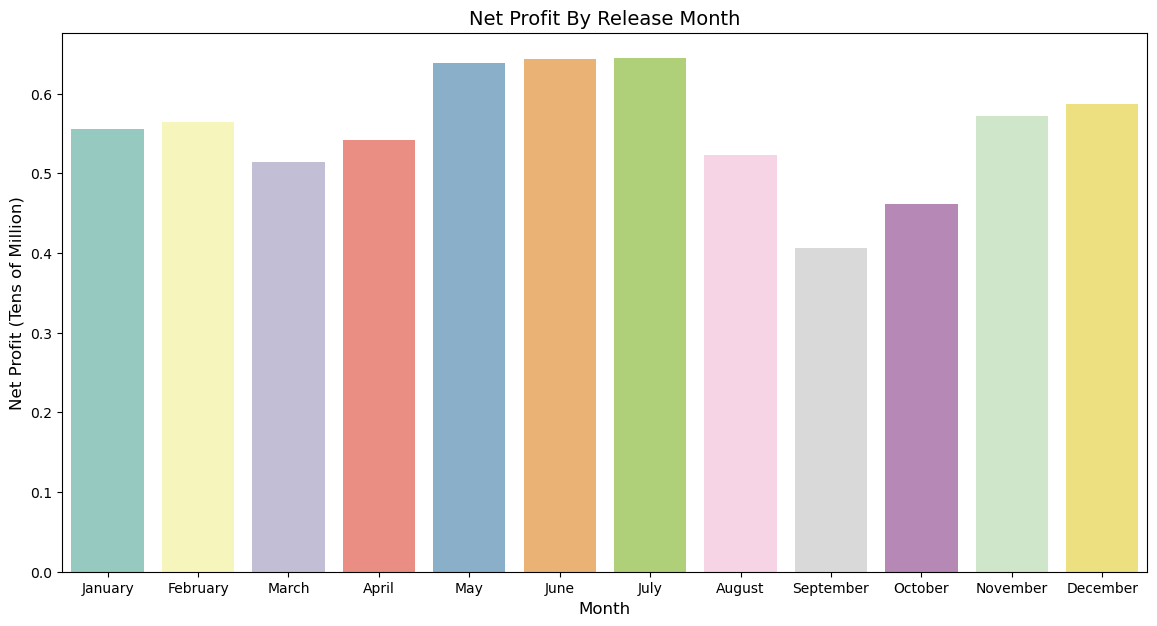

In [347]:
plt.figure(figsize=(14,7))
ax8 = sns.barplot(x=profit_months['Date'], y=profit_months['Profit Margin'], palette='Set3', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit (Tens of Million)', fontsize=12)
plt.title('Net Profit By Release Month', fontsize=14)
plt.savefig('MarginByMonth');

Interestingly, May, June and July shoot to the top in terms of both median net profit and profit margin. It appears that the summer months tend to result in greater success, perhaps as a result of an influx of children and their parents during summer break. Now as previously mentioned, let's dig a little further and see which genre tends to do the best in which month.

In [348]:
genre_budget.head()

,Movie,Year,IMDb,Rating,Runtime,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit,Genre
0,Avengers: Endgame,2019,8.4,PG-13,181,"Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Action
1,Avengers: Endgame,2019,8.4,PG-13,181,"Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Adventure
2,Avengers: Endgame,2019,8.4,PG-13,181,"Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Drama
3,Avatar,2009,7.8,PG-13,162,"Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09,Action
4,Avatar,2009,7.8,PG-13,162,"Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09,Adventure


In [349]:
genre_budget['Release Date'] = pd.to_datetime(genre_budget['Release Date'])
genre_budget['Date'] = [x.strftime('%B') for x in genre_budget['Release Date']]
genre_budget.head()

,Movie,Year,IMDb,Rating,Runtime,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit Margin,Adjusted Budget,Adjusted Profit,Genre,Date
0,Avengers: Endgame,2019,8.4,PG-13,181,2019-04-23,400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Action,April
1,Avengers: Endgame,2019,8.4,PG-13,181,2019-04-23,400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Adventure,April
2,Avengers: Endgame,2019,8.4,PG-13,181,2019-04-23,400000000,858373000,2797800564,2397800564,0.857031,4.540623e+08,2.721877e+09,Drama,April
3,Avatar,2009,7.8,PG-13,162,2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09,Action,December
4,Avatar,2009,7.8,PG-13,162,2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,3.693536e+08,3.976709e+09,Adventure,December


In this analysis, we focus on which genre doing well during which months of the years, i.e.: we need information about Date, Genre, Adjusted Profit, Profit Margin.

In [350]:
#create a table with necessary information only
genre_by_month = genre_budget[['Date', 'Genre','Adjusted Profit', 'Profit Margin']]
genre_by_month

,Date,Genre,Adjusted Profit,Profit Margin
0,April,Action,2.721877e+09,0.857031
1,April,Adventure,2.721877e+09,0.857031
2,April,Drama,2.721877e+09,0.857031
3,December,Action,3.976709e+09,0.915014
4,December,Adventure,3.976709e+09,0.915014
...,...,...,...,...
11212,December,Film-Noir,6.687569e+06,0.400000
11214,October,Comedy,5.004609e+07,0.828571
11215,October,Mystery,5.004609e+07,0.828571
11217,January,Film-Noir,1.149158e+07,0.500000


In [352]:
genre_month_ranked = genre_by_month.groupby(['Genre', 'Date'], as_index = False)['Adjusted Profit'].median().sort_values(by = 'Adjusted Profit', ascending = False)
genre_month_ranked

,Genre,Date,Adjusted Profit
227,War,July,9.276453e+08
32,Animation,May,7.530719e+08
157,Musical,March,6.805171e+08
30,Animation,June,6.366460e+08
122,History,May,5.979182e+08
...,...,...,...
240,Western,June,-1.035118e+07
118,History,January,-1.835967e+07
236,Western,December,-2.082714e+07
233,War,September,-2.179037e+07


In [359]:
#top 6 most profitable genre are: 'Animation', 'Adventure', 'Sci-Fi', 'Family', 'Action', 'Fantasy'
Animation_profit = genre_month_ranked[genre_month_ranked['Genre']=='Animation']
Adventure_profit = genre_month_ranked[genre_month_ranked['Genre'] == 'Adventure']
Scifi_profit = genre_month_ranked[genre_month_ranked['Genre']=='Sci-Fi']
Family_profit = genre_month_ranked[genre_month_ranked['Genre'] == 'Family']
Action_profit = genre_month_ranked[genre_month_ranked['Genre'] == 'Action']
Fantasy_profit = genre_month_ranked[genre_month_ranked['Genre']=='Fantasy']

In [360]:
#concat the data frames together
top6_profit = pd.concat([Animation_profit,Adventure_profit,Scifi_profit,Family_profit,Action_profit,Fantasy_profit])
top6_profit

,Genre,Date,Adjusted Profit
32,Animation,May,7.530719e+08
30,Animation,June,6.366460e+08
28,Animation,January,3.054101e+08
33,Animation,November,2.847465e+08
31,Animation,March,2.430334e+08
...,...,...,...
96,Fantasy,April,4.070232e+07
99,Fantasy,February,3.087400e+07
100,Fantasy,January,2.923991e+07
107,Fantasy,September,2.425849e+07


In [361]:
#Create a table of the months in order.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#Create a pivot table of month_genre_df, use the month_in_order table to reindex the pivot table.
pivot_month_profit = top6_profit.pivot(index='Date', columns='Genre', values='Adjusted Profit').reindex(months)
pivot_month_profit

Genre,Action,Adventure,Animation,Family,Fantasy,Sci-Fi
Date,,,,,,
January,2.831376e+07,6.885101e+07,3.054101e+08,1.168466e+08,2.923991e+07,3.234019e+07
February,4.309414e+07,6.576032e+07,2.260393e+08,8.769536e+07,3.087400e+07,3.322980e+07
March,6.008996e+07,1.417064e+08,2.430334e+08,8.587671e+07,8.284120e+07,5.547638e+07
April,7.272063e+07,1.616463e+08,3.258239e+07,2.302656e+07,4.070232e+07,1.616463e+08
May,2.764521e+08,3.930905e+08,7.530719e+08,1.965628e+08,2.421286e+08,3.850230e+08
June,2.360503e+08,3.072996e+08,6.366460e+08,1.078029e+08,1.711038e+08,2.512111e+08
July,1.984949e+08,2.075373e+08,2.014496e+08,5.039945e+07,4.244924e+07,1.806404e+08
August,4.202309e+07,5.697414e+07,4.525717e+07,9.477619e+07,8.958846e+07,3.595214e+07
September,2.702715e+07,6.055394e+07,1.415082e+08,3.138592e+07,2.425849e+07,8.084671e+07


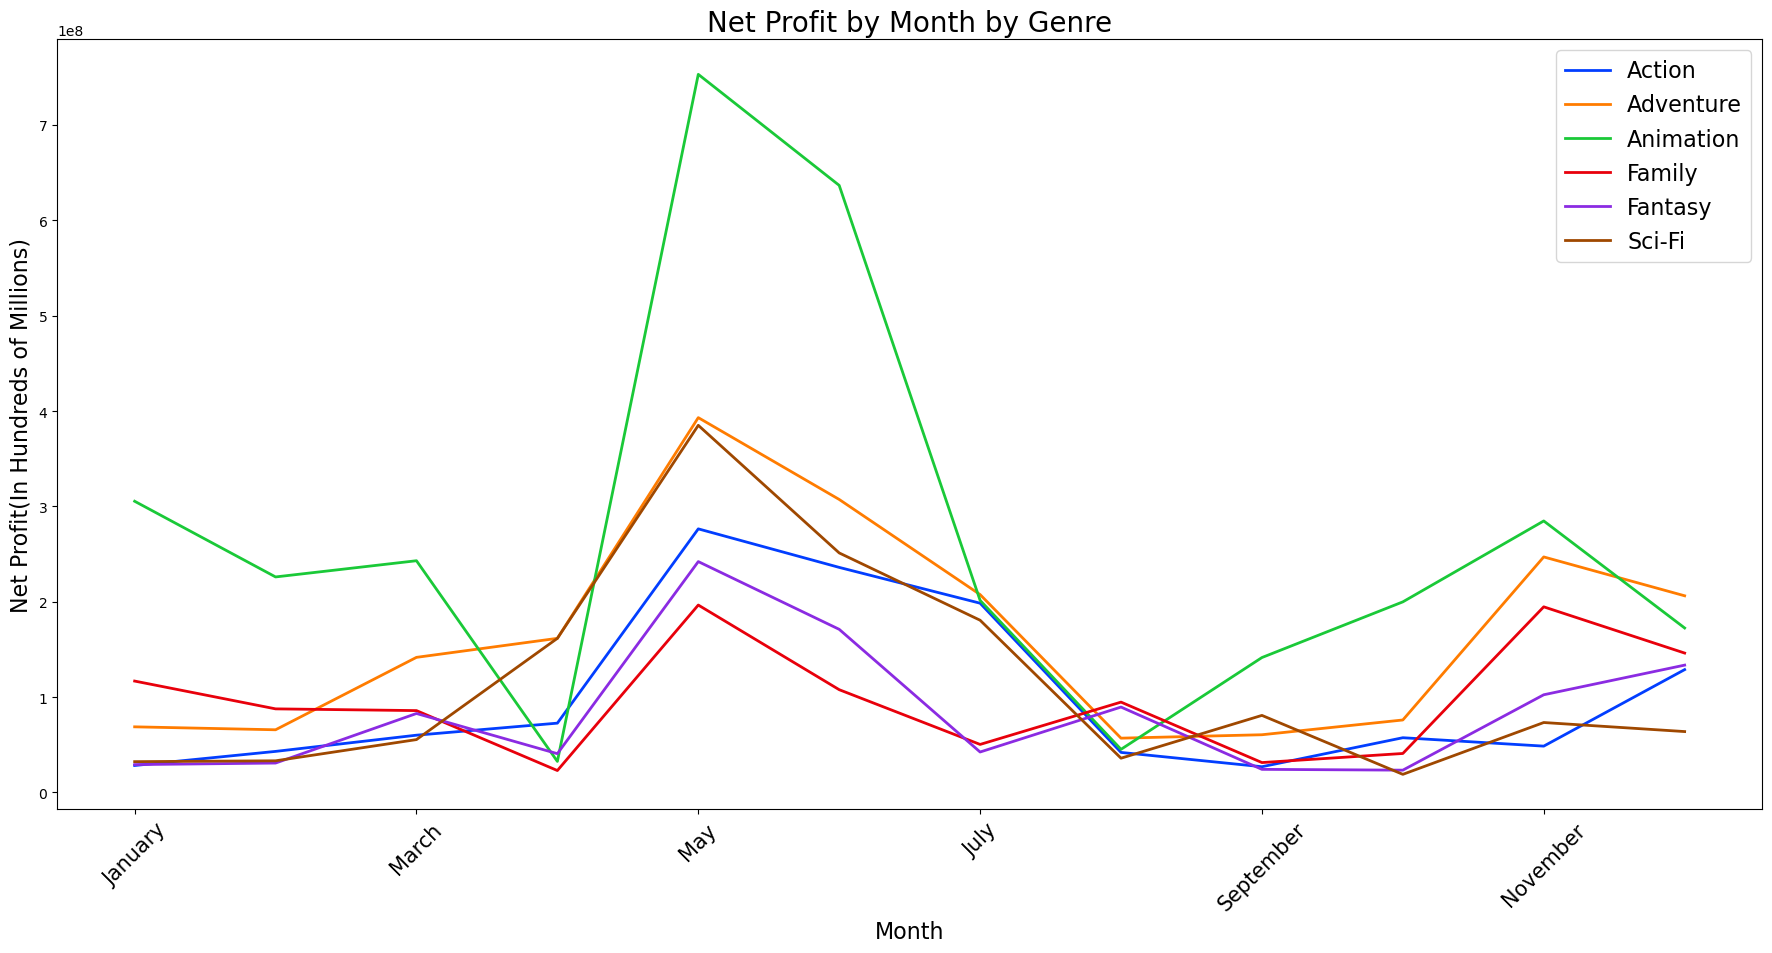

In [363]:
#Visualize the top 6 most profitable genre's by month
ax9 = pivot_month_profit.plot(kind='line', figsize=(22, 10), rot=0,lw = 2)
plt.legend(prop={'size': 16})
plt.xlabel('Month', fontsize=16)
plt.ylabel('Net Profit(In Hundreds of Millions)', fontsize=16)
plt.title('Net Profit by Month by Genre', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyMonthbyGenre');

We can see that each genre follows the same basic pattern, with the summer months proving to be the most profitable time to release a movie. Some further analysis shows that releasing an animation movie in particular during the summer months will have the greatest potential for high net profits. When considering what aspects go into creating a successful movie, it's clear that one must take take into account the impact of a well timed release date.

We recommend that Microsoft release the bulk of their movies, especially Animation, during the summer months. Animation, Adventure and Family movies would see similar success if released in November, but the recommendation remains to focus on summer.